# 🐍 Python + Barcodes 🏷️: Automate Your Inventory Without Errors

## ❓Ever dreamed of generating your own product labels in seconds?  
🙃 Today I bring you a Python tool that makes it real: generate personalized barcodes ready to print... in just one click!

## 👉 Solution  
We use `python-barcode`, `pandas`, and `Pillow` to generate visual labels with product name, price, and barcode ready for inventory or logistics.

## 🔧 How does it work?  
⚙️ Extract a product list from Excel  
🧠 Generate barcodes with `Code128`  
🎨 Add name, price, and logo with Pillow  
🖨️ Arrange multiple labels per sheet (Avery, Zebra, etc.)

## 🔎 Why does it matter?  
✅ Automates repetitive tasks  
✅ Improves traceability  
✅ Reduces human errors  
✅ Ideal for SMEs, logistics, and e-commerce

## ✨ Real example:  
📦 A small e-commerce generates shipping labels, ready to print on A4 sheets, personalized and with scannable codes.

## ⚙️ Business impact:  
💸 Saves time in labeling  
📉 Reduces inventory errors  
📈 Professional product presentation

## 📊 Code summary:  
🧾 Reads products from an Excel file  
🏷️ Creates barcode for each product  
🖼️ Adds name and price to each image  
📄 Generates a PDF with printable labels

🔗 [Github](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main)

💭 Reflection:  
How would you optimize your workflow with this solution?  
Follow me for more tools turning complex ideas into clear solutions 🤖

🔑 #Python #DataScience #MachineLearning #AI #Entrepreneurship #SmartInventory #Flask #Pillow #Automation #TechEntrepreneurs #Innovation

🔁 Feel free to share if you found this useful.  
⚠️ Please do not copy or repost as your own. Respect the original work.

----

# 🐍 Python + Códigos de Barras 🏷️: Automatiza tu inventario sin errores

## ❓¿Alguna vez soñaste con generar tus propias etiquetas de producto en segundos?  
🙃 Hoy te traigo una herramienta en Python que lo hace realidad: crea códigos de barras personalizados listos para imprimir... ¡en solo un clic!

## 👉 Solución  
Usamos `python-barcode`, `pandas` y `Pillow` para generar etiquetas visuales con nombre, precio y código listo para usar en inventario o logística.

## 🔧 ¿Cómo funciona?  
⚙️ Extraemos una lista de productos desde Excel  
🧠 Generamos códigos de barras con `Code128`  
🎨 Añadimos nombre, precio y logo con Pillow  
🖨️ Organizamos múltiples etiquetas por hoja (Avery, Zebra, etc.)

## 🔎 ¿Por qué importa?  
✅ Automatiza tareas repetitivas  
✅ Mejora la trazabilidad  
✅ Reduce errores humanos  
✅ Ideal para pymes, logística y e-commerce

## ✨ Ejemplo real:  
📦 Un pequeño ecommerce genera etiquetas para sus envíos, listas para imprimir en hoja A4, personalizadas y con código escaneable.

## ⚙️ Impacto en el negocio:  
💸 Ahorro de tiempo en etiquetado  
📉 Reducción de errores de inventario  
📈 Profesionalismo en la presentación del producto

## 📊 Resumen del código:  
🧾 Lee productos desde un archivo Excel  
🏷️ Crea código de barras por producto  
🖼️ Añade nombre y precio a cada imagen  
📄 Genera un PDF con etiquetas para imprimir

🔗 [Github](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main)

💭 Reflexión:  
¿Cómo optimizarías tu flujo de trabajo con esta solución?  
Sígueme para más herramientas que convierten ideas complejas en soluciones claras 🤖

🔑 #Python #DataScience #MachineLearning #AI #Emprendimiento #InventarioInteligente #Flask #Pillow #Automatización #EmprendedoresTech #Innovación

🔁 Si te ha parecido útil, siéntete libre de compartir esta publicación con tu red.  
⚠️ Por favor, no la copies ni la publiques como propia. Respeta el trabajo original.

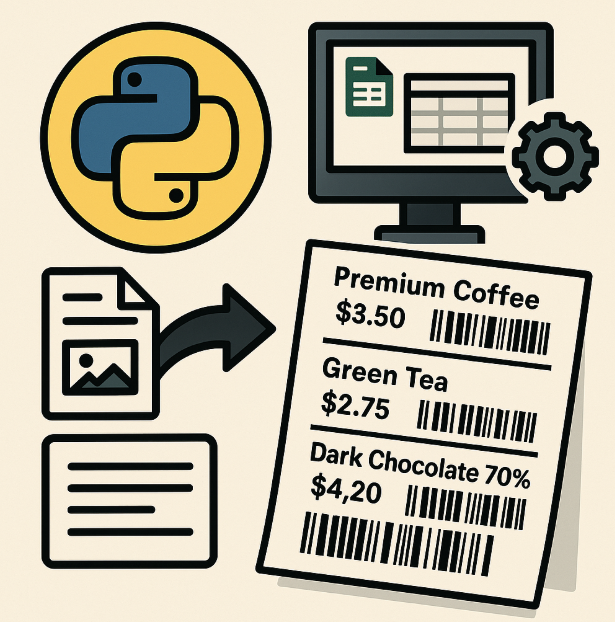


╒════════════════════╤════════╤═════════╕
│ Product            │    SKU │ Price   │
╞════════════════════╪════════╪═════════╡
│ Premium Coffee     │ 001234 │ $3.50   │
├────────────────────┼────────┼─────────┤
│ Green Tea          │ 001235 │ $2.75   │
├────────────────────┼────────┼─────────┤
│ Dark Chocolate 70% │ 001236 │ $4.20   │
╘════════════════════╧════════╧═════════╛

✅ Labels generated successfully.



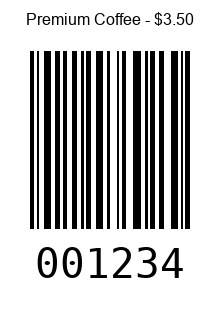

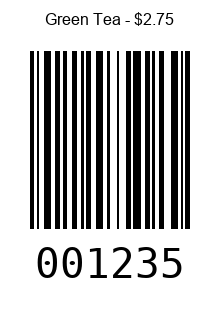

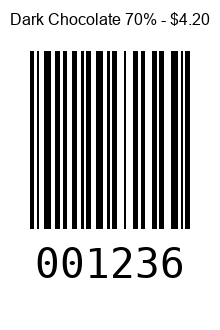

In [1]:
# Import necessary libraries
import pandas as pd  # For handling tabular data
from barcode.codex import Code128  # To generate Code128 barcodes
from barcode.writer import ImageWriter  # To output barcode as image
from PIL import Image, ImageDraw, ImageFont  # For image creation and drawing text
import os  # To handle file paths and directories
from io import BytesIO  # To handle images in memory buffers
from IPython.display import display, Image as IPImage  # To display images inside Jupyter notebooks
from tabulate import tabulate  # Optional: for pretty-printing tables in console

# Sample product data as a dictionary
data = {
    "Product": ["Premium Coffee", "Green Tea", "Dark Chocolate 70%"],
    "Price": [3.5, 2.75, 4.2],
    "SKU": ["001234", "001235", "001236"]
}

# Convert dictionary to pandas DataFrame for easy iteration
df = pd.DataFrame(data)

# Define output directory for saving label images
OUTPUT_DIR = "20250520_labels"

# Define font path and size for drawing text on labels
FONT_PATH = "arial.ttf"
FONT_SIZE = 16

def load_font(path=FONT_PATH, size=FONT_SIZE):
    """
    Attempts to load a TrueType font file.
    If not found, falls back to default PIL font.
    """
    try:
        return ImageFont.truetype(path, size)
    except IOError:
        print(f"⚠️ Font '{path}' not found, using default font instead.")
        return ImageFont.load_default()

def generate_label(product_name, price, sku, font, output_dir=OUTPUT_DIR):
    """
    Generates a barcode label image for a product.
    - Creates a barcode for the SKU using Code128.
    - Adds product name and price text above the barcode.
    - Saves the final label image to disk.
    
    Returns the path to the saved label image.
    """
    # Generate barcode object for the SKU
    barcode = Code128(sku, writer=ImageWriter())
    
    # Use BytesIO buffer to avoid saving intermediate barcode image to disk
    barcode_buffer = BytesIO()
    barcode.write(barcode_buffer)
    barcode_buffer.seek(0)  # Reset buffer pointer to beginning
    
    # Open barcode image from buffer
    barcode_img = Image.open(barcode_buffer)

    # Get dimensions of barcode image
    width, height = barcode_img.size

    # Define total label height (barcode + space for text)
    label_height = height + 50

    # Create a new blank white image for the label
    label_img = Image.new("RGB", (width, label_height), "white")

    # Paste barcode onto label image, leaving space at top for text
    label_img.paste(barcode_img, (0, 40))

    # Prepare to draw text on label image
    draw = ImageDraw.Draw(label_img)

    # Create the label text string (product name and price)
    text = f"{product_name} - ${price:.2f}"

    # Measure the text size to center it horizontally
    bbox = draw.textbbox((0, 0), text, font=font)  # (left, top, right, bottom)
    text_width = bbox[2] - bbox[0]

    # Calculate horizontal position for centered text
    text_x = (width - text_width) // 2

    # Draw the text on the label image, positioned 10 pixels from top
    draw.text((text_x, 10), text, font=font, fill="black")

    # Make sure output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Define output file path for label image
    output_path = os.path.join(output_dir, f"label_{sku}.png")

    # Save label image to disk
    label_img.save(output_path)

    # Return the saved file path for later use/display
    return output_path

def print_summary(df):
    """
    Prints a formatted summary table of products, SKUs, and prices.
    Uses 'tabulate' if installed for better formatting.
    """
    table = []
    for _, row in df.iterrows():
        table.append([row["Product"], row["SKU"], f"${row['Price']:.2f}"])
    try:
        # Print pretty table if tabulate is installed
        print(tabulate(table, headers=["Product", "SKU", "Price"], tablefmt="fancy_grid"))
    except ImportError:
        # Fallback to simple print
        print("Product | SKU | Price")
        for r in table:
            print(f"{r[0]} | {r[1]} | {r[2]}")

def main():
    """
    Main function to generate all barcode labels and print a summary.
    Displays each generated label image inline if running in Jupyter.
    """
    # Load the font to be used for text drawing
    font = load_font()

    # List to hold paths to generated label images
    paths = []

    # Loop through all rows in the product dataframe
    for _, row in df.iterrows():
        # Generate a label image for each product
        path = generate_label(row["Product"], row["Price"], row["SKU"], font)
        paths.append(path)

    # Print a nice summary table of products and prices
    print_summary(df)

    print("\n✅ Labels generated successfully.\n")

    # If running in Jupyter Notebook, display each label image
    for path in paths:
        display(IPImage(filename=path))

# Run the main function when this script is executed
if __name__ == "__main__":
    main()
